We want to represent the circle

$$
C = \lbrace (x,y) \mid x^2 + y^2 \leq 1 \rbrace.
$$

Let

$$
\theta_i = \frac{\pi}{2^{i+1}}.
$$

We can do an approximation whose accuracy increases with each $N \geq 1$ in the form of:

$$
\begin{align*}
\alpha_0 \geq |x| \\
\beta_0  \geq |y| \\
\alpha_N \leq 1 \\
\beta_N \leq \tan(\theta_i) \alpha_N\\
\end{align*}
$$

(interesting! you would have assumed the things above would link to the things below, but they don't! what's the plot look like if you just do the things above?
oh duh, there's no relation because they're different variables.)


and for $i = 1,\ldots,N$:



$$
\begin{align*}
\alpha_{i}    =   \cos(\theta_i) \alpha_{i-1} + \sin(\theta_i) \beta_{i-1}  \\
 \beta_{i} \geq |-\sin(\theta_i) \alpha_{i-1} + \cos(\theta_i) \beta_{i-1}| \\
\end{align*}
$$

# notes

- do the rectangle tower example. that should be instructive
- everything has to be self-similar!
- are there other functions that are easy to represent in this self-similar way? like exp?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

def theta(i):
    return np.pi/(2**(i + 1))

In [2]:
N = 2

In [73]:
gamma = 1

def foo(N=2):

    x = cvx.Variable()
    y = cvx.Variable()

    a = cvx.Variable(N+1)
    b = cvx.Variable(N+1)
    
    cst = [
        a[0] >= cvx.abs(x),
        b[0] >= cvx.abs(y),
        a[N] <= 1,
        b[N] <= np.tan(theta(N))*a[N]

    ]

    for i in range(1,N+1):
        t = theta(i)
        
        # g = gamma*((i+2)/N)
        g = .1

        cst += [
            a[i] ==        (np.cos(t)* (a[i-1] + g) + np.sin(t)*b[i-1]),
            b[i] >= cvx.abs( -np.sin(t)*( a[i-1] + g) + np.cos(t)*b[i-1] ),
        ]
        
    obj = np.random.randn()*x + np.random.randn()*y
    obj = cvx.Maximize(obj)
    prob = cvx.Problem(obj, cst)
    prob.solve()
    # print(prob.status)
    
    return float(x.value), float(y.value)

In [74]:
xys = [foo(6) for _ in range(100)]

x, y = zip(*xys)

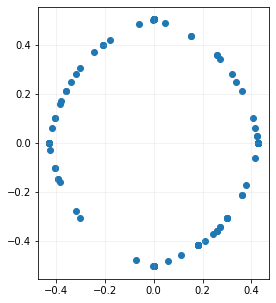

In [77]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x,y)
ax.grid(alpha=.2)
ax.set_aspect(1)